In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from sklearn.model_selection import train_test_split
import re  # For text cleaning
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/IMDB Dataset.csv')

In [ ]:
def clean_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove special characters and numbers using regex
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function to the dataset
df['cleaned_review'] = df['review'].apply(clean_text)

In [ ]:


# Map sentiment to binary values
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Clean the text data
df['cleaned_review'] = df['review'].apply(clean_text)

# Split into features (X) and labels (y)
X = df['cleaned_review']
y = df['sentiment']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize the text data
vocab_size = 10000  # Use the top 10,000 most frequent words
max_len = 500  # Limit reviews to 500 words
embedding_dim = 128  # Dimension of word embeddings

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input size
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [ ]:
# Define the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len),
    SpatialDropout1D(0.2),  # Dropout for regularization
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),  # LSTM layer
    Dense(64, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout for regularization
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    X_train_pad, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(X_test_pad, y_test)
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1084s 2s/step - accuracy: 0.7021 - loss: 0.5433 - val_accuracy: 0.8514 - val_loss: 0.3542
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1103s 2s/step - accuracy: 0.8632 - loss: 0.3448 - val_accuracy: 0.8582 - val_loss: 0.3305
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1076s 2s/step - accuracy: 0.8917 - loss: 0.2870 - val_accuracy: 0.8739 - val_loss: 0.3164
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1095s 2s/step - accuracy: 0.9050 - loss: 0.2525 - val_accuracy: 0.8835 - val_loss: 0.2991
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1085s 2s/step - accuracy: 0.9164 - loss: 0.2194 - val_accuracy: 0.8830 - val_loss: 0.3211
313/313 ━━━━━━━━━━━━━━━━━━━━ 69s 222ms/step - accuracy: 0.8808 - loss: 0.3188
Test Accuracy: 0.8830


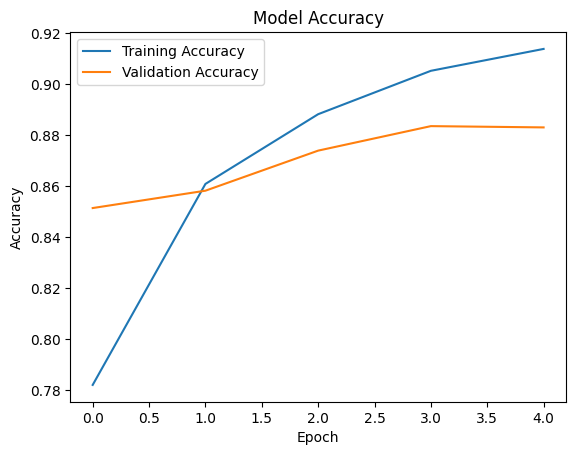

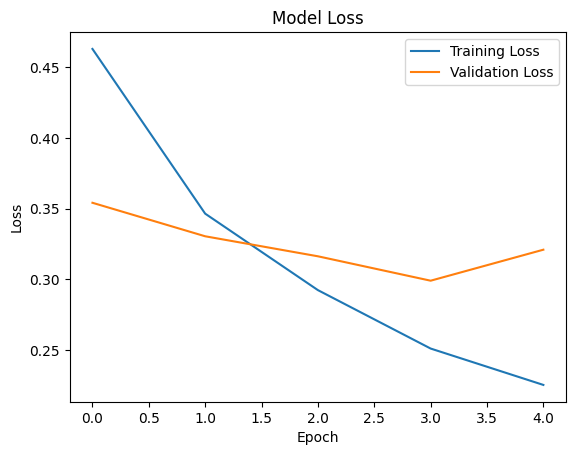

In [ ]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Function to preprocess new reviews
def preprocess_review(text):
    text = clean_text(text)  # Clean the input text
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len)
    return padded_sequence

# Example: Predict sentiment for a new review
example_review = "This movie was fantastic! I loved every moment of it."
example_review_processed = preprocess_review(example_review)

# Predict sentiment
prediction = model.predict(example_review_processed)
print(f"Sentiment: {'Positive' if prediction > 0.5 else 'Negative'} with confidence {prediction[0][0]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step
Sentiment: Positive with confidence 0.9802
